In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [126]:
euler = np.array(pd.read_csv('energy_euler.csv', sep=','))
barneshut = np.array(pd.read_csv('energy_barneshut.csv', sep=','))
ms = np.array(pd.read_csv('energy_ms.csv', sep=','))

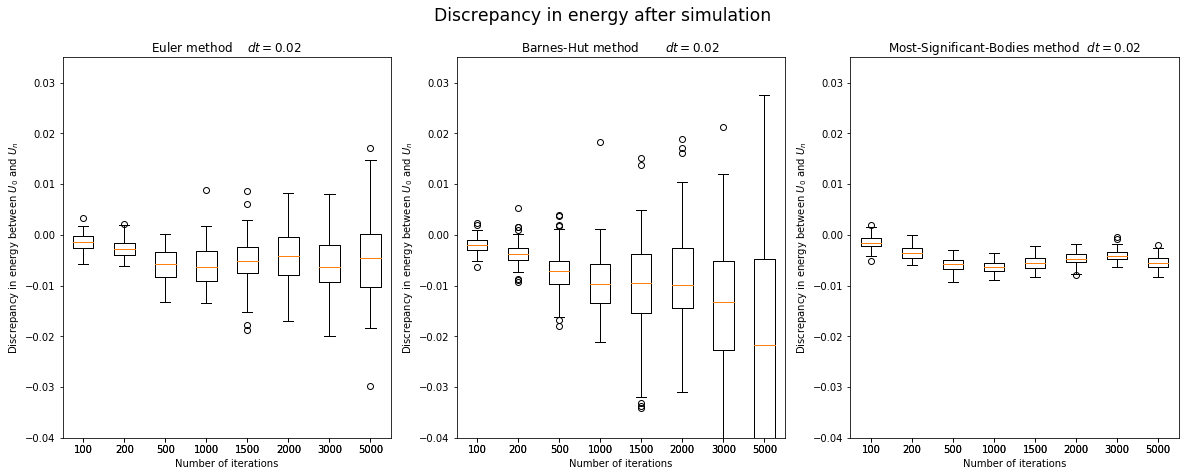

In [134]:
def boxPlotMethod(data, title, ax1):
    sets = np.array([], ndmin=2)
    lbls = np.array([], ndmin=2)
    groups = np.array([100,200,500,1000,1500,2000,3000,5000])
    ax1.set_xticklabels(groups)
    ax1.set_xticks(np.arange(1,groups.size+1))
    ax1.set_xlabel("Number of iterations")
    ax1.set_ylabel(r"Discrepancy in energy between $U_0$ and $U_n$")
    ax1.set_ylim((-0.04,0.035))
    ax1.set_title(title)
    i = 1
    for x in [100,200,500,1000,1500,2000,3000,5000]:
        ax1.boxplot(data[data[:,0] == x][:,1], positions=[i], labels=[x], widths = 0.5)
        i += 1

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,7))
mainTitle = "Discrepancy in energy after simulation"
params = r"$dt = 0.02$"
fig.suptitle(mainTitle, fontsize = 'xx-large')
boxPlotMethod(euler, "Euler method" + "\t"+params, ax1)
boxPlotMethod(barneshut, "Barnes-Hut method" + "\t"+params, ax2)
boxPlotMethod(ms, "Most-Significant-Bodies method" + "\t"+params, ax3)

fig.savefig('energy_conservation.pdf')

plt.show()